## Latent Dirichlet Allocation (LDA) Topic Modeling


Topic modeling is a branch of unsupervised natural language processing which is used to represent a text document with the help of several topics, that can best explain the underlying information in a particular document.This can be thought in terms of clustering, but with a difference. Instead of numerical features, we have a collection of words that we want to group together in such a way that each group represents a topic in a document. In our case, topic modeling will be used to identify the aspects that caused the low rating reviews. 

### LDA has two probabilistic components: 

1. the probability distribution of topics in documents
2. the probability distribution of words in each topic


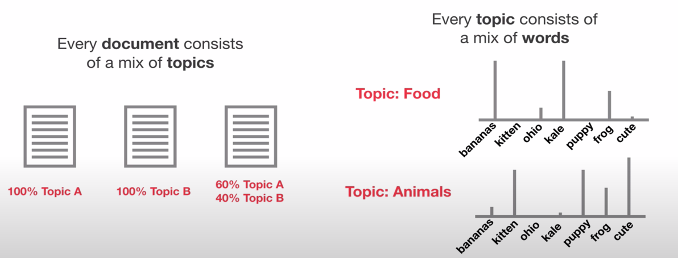


### To use a topic modeling technique, we will need two pieces of information:
1. A document-term matrix and 
2. The number of topics you would like the algorithm to pick up.

In this section, the LDA model from the gensim library will be used to find the topics within the low rating reviews. The coherence score will be used to find the optimal amount of topics to describe our corpus. 

In [1]:
import pandas as pd
import numpy as np
import spacy
import gensim
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from gensim import corpora, models
from nltk import word_tokenize

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/usr/local/bin/anaconda3/lib/python3.7/site-packages/matplotlib/backend_bases.py:57: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.
  from PIL import PILLOW_VERSION
/usr/local/bin/anaconda3/lib/python3.7/site-packages/matplotlib/backend_bases.py:57: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.
  from PIL import PILLOW_VERSION


In [2]:
# load the train data

df = pd.read_pickle("clean_df.pkl")
df.head()

,overall,reviewText,department,clean1,tokens,clean2
0,5.0,No adverse comment.,Beverages,no adverse comment,"[no, adverse, comment]",no adverse comment
1,5.0,Gift for college student.,Beverages,gift for college student,"[gift, for, college, student]",gift college student
2,5.0,"If you like strong tea, this is for you. It mi...",Beverages,if you like strong tea this is for you it mi...,"[if, you, like, strong, tea, this, is, for, yo...",like strong tea might little strong
3,5.0,Love the tea. The flavor is way better than th...,Beverages,love the tea the flavor is way better than th...,"[love, the, tea, the, flavor, is, way, better,...",love tea flavor way well regular lipton black ...
4,5.0,I have searched everywhere until I browsed Ama...,Beverages,i have searched everywhere until i browsed ama...,"[i, have, searched, everywhere, until, i, brow...",search everywhere browse found tea lipton sell...


In [4]:
# filter for reviews with 1 and 2 star ratings 

df = df.loc[df['overall'].isin((1,2))]
df['overall'].value_counts()

1.0    44736
2.0    38034
Name: overall, dtype: int64

In [5]:
# create list of words for each review

word_lists = df['clean2'].apply(lambda x: word_tokenize(x)).tolist()
word_lists[0]

['tea', 'look', 'like', 'coffee', 'ground', 'brew', 'threw']

In [6]:
# create a dictionary and document term matrix for the reviews

id2word = corpora.Dictionary(word_lists)
dtm = [id2word.doc2bow(rev) for rev in word_lists]

In [7]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel


# Build LDA model with 6 topics
lda_model = LDA(corpus=dtm, id2word=id2word , num_topics=6, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [8]:
lda_model.print_topics()

[(0,
  '0.025*"not" + 0.022*"order" + 0.021*"bag" + 0.017*"box" + 0.015*"product" + 0.014*"time" + 0.011*"receive" + 0.011*"stale" + 0.011*"open" + 0.010*"package"'),
 (1,
  '0.093*"coffee" + 0.061*"tea" + 0.039*"cup" + 0.016*"green" + 0.013*"weak" + 0.012*"link" + 0.011*"water" + 0.009*"k" + 0.008*"pod" + 0.008*"work"'),
 (2,
  '0.040*"not" + 0.016*"price" + 0.014*"chocolate" + 0.013*"buy" + 0.012*"good" + 0.011*"well" + 0.011*"like" + 0.010*"small" + 0.010*"store" + 0.010*"bar"'),
 (3,
  '0.029*"salt" + 0.019*"eat" + 0.017*"sauce" + 0.015*"cheese" + 0.014*"flavor" + 0.014*"gross" + 0.013*"salty" + 0.012*"soup" + 0.011*"weird" + 0.010*"chicken"'),
 (4,
  '0.087*"taste" + 0.059*"like" + 0.058*"not" + 0.041*"flavor" + 0.019*"good" + 0.018*"try" + 0.013*"bad" + 0.012*"no" + 0.012*"really" + 0.010*"sweet"'),
 (5,
  '0.021*"product" + 0.017*"not" + 0.017*"sugar" + 0.014*"oil" + 0.013*"ingredient" + 0.009*"food" + 0.008*"no" + 0.008*"free" + 0.008*"organic" + 0.007*"say"')]

In [9]:
# visualize the clustering of the topics and their respective word distribution 

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, dtm, id2word)
vis

/usr/local/bin/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/usr/local/bin/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.141771 -0.051474       1        1  27.274143
5      0.073338  0.052903       2        1  20.752060
0      0.162622  0.086708       3        1  18.504754
2      0.118519  0.015332       4        1  17.869172
1     -0.318107  0.221001       5        1   7.810839
3     -0.178143 -0.324470       6        1   7.789031, topic_info=        Term          Freq         Total Category  logprob  loglift
49     taste  45062.000000  45062.000000  Default  30.0000  30.0000
1     coffee  13762.000000  13762.000000  Default  29.0000  29.0000
3       like  35796.000000  35796.000000  Default  28.0000  28.0000
5        tea   9112.000000   9112.000000  Default  27.0000  27.0000
61    flavor  23696.000000  23696.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
61    flavor   2056.879612  23696.575476   Topic6  -4.2755   0.1083
102    spice    817.798562   1820.456521   Topic6  -5.1978   1.7522
854   powder    891.412435   2469.696816   Topic6  -5.1116   1.5334
3       like   1228.858220  35796.887701   Topic6  -4.7906  -0.8193
2084    bite    741.288687   1445.788534   Topic6  -5.2961   1.8844

[349 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
2172      2  0.998525  acid
120       1  0.225744   add
120       2  0.465742   add
120       5  0.036404   add
120       6  0.271972   add
...     ...       ...   ...
220       2  0.182107  year
220       3  0.697849  year
220       4  0.066591  year
220       5  0.053341  year
2040      1  0.999267  yuck

[539 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 1, 3, 2, 4])

In [10]:
# calculate the perplexity of the model (the lower the better) and the coherence score of the topics 

print('\nPerplexity: ', lda_model.log_perplexity(dtm))


from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=word_lists, dictionary=id2word , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.392719255989411

Coherence Score:  0.5394250736681971


In [12]:
# Compute c_v coherence for various number of topics

# Parameters:
# ----------
# dictionary : Gensim dictionary
# corpus : Gensim corpus
# texts : List of input texts
# limit : Max num of topics

# Returns:
# -------
# model_list : List of LDA topic models
# coherence_values : Coherence values corresponding to the LDA model with respective number of topics

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [13]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=dtm, texts=word_lists, start=2, limit=20, step=1)

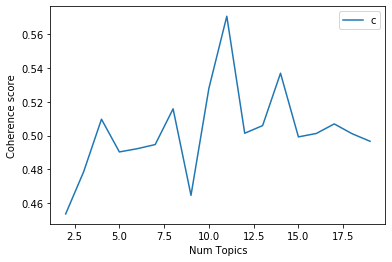

In [14]:
# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [15]:
# Print the coherence scores

for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4537
Num Topics = 3  has Coherence Value of 0.4785
Num Topics = 4  has Coherence Value of 0.5097
Num Topics = 5  has Coherence Value of 0.4904
Num Topics = 6  has Coherence Value of 0.4923
Num Topics = 7  has Coherence Value of 0.4947
Num Topics = 8  has Coherence Value of 0.5159
Num Topics = 9  has Coherence Value of 0.4647
Num Topics = 10  has Coherence Value of 0.528
Num Topics = 11  has Coherence Value of 0.5707
Num Topics = 12  has Coherence Value of 0.5014
Num Topics = 13  has Coherence Value of 0.5059
Num Topics = 14  has Coherence Value of 0.537
Num Topics = 15  has Coherence Value of 0.4993
Num Topics = 16  has Coherence Value of 0.5013
Num Topics = 17  has Coherence Value of 0.5069
Num Topics = 18  has Coherence Value of 0.5011
Num Topics = 19  has Coherence Value of 0.4967


In [20]:
# i = 1
# for model in model_list:
#     model.save("model{}.gensim".format(i))
#     i += 1


#models with 4, 8,10, and 11 topics are saved 

In [54]:
# Select the model and print the topics

optimal_model = model_list[9]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=20)

[(0,
  '0.030*"product" + 0.027*"ingredient" + 0.021*"not" + 0.021*"organic" + 0.018*"food" + 0.015*"label" + 0.012*"list" + 0.008*"health" + 0.008*"company" + 0.008*"natural"'),
 (1,
  '0.154*"taste" + 0.081*"like" + 0.043*"not" + 0.030*"bad" + 0.018*"smell" + 0.018*"awful" + 0.016*"terrible" + 0.015*"horrible" + 0.014*"good" + 0.014*"away"'),
 (2,
  '0.022*"like" + 0.018*"not" + 0.017*"eat" + 0.013*"sauce" + 0.013*"try" + 0.011*"cheese" + 0.010*"taste" + 0.010*"food" + 0.009*"soup" + 0.008*"chicken"'),
 (3,
  '0.050*"sugar" + 0.044*"oil" + 0.024*"coconut" + 0.019*"free" + 0.016*"add" + 0.015*"low" + 0.015*"not" + 0.014*"milk" + 0.012*"fat" + 0.012*"calorie"'),
 (4,
  '0.039*"coffee" + 0.036*"not" + 0.017*"price" + 0.015*"taste" + 0.015*"like" + 0.014*"try" + 0.013*"good" + 0.011*"bean" + 0.010*"buy" + 0.010*"well"'),
 (5,
  '0.023*"product" + 0.016*"review" + 0.014*"not" + 0.014*"no" + 0.013*"time" + 0.013*"order" + 0.012*"date" + 0.009*"day" + 0.009*"year" + 0.009*"bad"'),
 (6,
  '0

In [5]:
# define the topics 

# 0 - ingredients 
# 1 - taste/smell
# 2 - texture
# 3 - calorie
# 4 - price
# 5 - delivery
# 6 - bland/dry food  
# 7 - unit of measure
# 8 - packaging
# 9 - snacks(chocolate/almonds/peanut butter 
# 10 -drinks 

top_dict = {}
top_desc = ['ingredients',  'taste/smell', 'texture', 'calorie', 'price', 'delivery', 'bland/dry food','unit of measure', 'packaging', 'snacks(chocolate/almonds/peanut butter)', 'drinks']


for i, v in enumerate(top_desc):
    top_dict[i] = v
top_dict

{0: 'ingredients',
 1: 'taste/smell',
 2: 'texture',
 3: 'calorie',
 4: 'price',
 5: 'delivery',
 6: 'bland/dry food',
 7: 'unit of measure',
 8: 'packaging',
 9: 'snacks(chocolate/almonds/peanut butter)',
 10: 'drinks'}

In [56]:
# visualize the clustering of the topics and their respective word distribution 

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, dtm, id2word)
vis

/usr/local/bin/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/usr/local/bin/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.026040 -0.152395       1        1  13.313203
4      0.059899 -0.032151       2        1  13.300969
8     -0.002844 -0.159776       3        1  10.805160
10     0.083394  0.092661       4        1  10.471515
2      0.058335 -0.028327       5        1   9.506562
9      0.133882  0.002386       6        1   8.881307
1      0.195628  0.104226       7        1   8.586881
0     -0.194440 -0.126382       8        1   8.568771
6      0.144548  0.087581       9        1   7.161140
3     -0.145646 -0.008913      10        1   6.418467
7     -0.306717  0.221091      11        1   2.986024, topic_info=          Term          Freq         Total Category  logprob  loglift
49       taste  46595.000000  46595.000000  Default  30.0000  30.0000
61      flavor  25444.000000  25444.000000  Default  29.0000  29.0000
3         like  37186.000000  37186.000000  Default  28.0000  28.0000
5          tea   8928.000000   8928.000000  Default  27.0000  27.0000
1       coffee  11879.000000  11879.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
271  sweetener    470.696279   1326.128868  Topic11  -4.7915   2.4754
172    product    972.146914  19980.524879  Topic11  -4.0662   0.4882
918        per    470.687037   2230.639772  Topic11  -4.7915   1.9554
103    stomach    378.033441    985.802548  Topic11  -5.0107   2.5528
524       pack    442.786696   3036.676867  Topic11  -4.8526   1.5858

[810 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
5500      2  0.992396     ad
120       1  0.030310    add
120       2  0.032866    add
120       3  0.000913    add
120       4  0.206873    add
...     ...       ...    ...
2040      5  0.009909   yuck
2040      6  0.003303   yuck
2040      7  0.985995   yuck
4175      2  0.994864  yucky
1712      7  0.995030    yuk

[2760 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 9, 11, 3, 10, 2, 1, 7, 4, 8])

In [2]:
# load model with 11 topics 

best_model = models.LdaModel.load('model10.gensim')
dictionary = corpora.Dictionary.load('model10.gensim.id2word')

In [7]:
# test on new bad review 

lemmatizer = WordNetLemmatizer()

new_texts = "the package came open"
tokens = [lemmatizer.lemmatize(token) for token in word_tokenize(new_texts.lower())if token not in stopwords.words('english')]
topics = best_model[dictionary.doc2bow(tokens)]
topics

[(0, 0.030303532),
 (1, 0.030303277),
 (2, 0.030303776),
 (3, 0.03030333),
 (4, 0.03030353),
 (5, 0.030303715),
 (6, 0.0303033),
 (7, 0.030303301),
 (8, 0.69696563),
 (9, 0.030303294),
 (10, 0.030303309)]

In [8]:
# print out the top three self-defined topics for the test review 

top_3 = sorted(topics, key=lambda x: x[1], reverse=True)[:3]
tops = [top_dict.get(k) for k,v in top_3 ]
tops

['packaging', 'texture', 'delivery']